# Data Classification Project
# Author: Yeromenko Maksym


## Dataset Description

### KDD Cup 1999 Data
| feature name                | type       |
|-----------------------------|------------|
| duration                    | continuous |
| protocol_type               | symbolic   |
| service                     | symbolic   |
| flag                        | symbolic   |
| src_bytes                   | continuous |
| dst_bytes                   | continuous |
| land                        | symbolic   |
| wrong_fragment              | continuous |
| urgent                      | continuous |
| hot                         | continuous |
| num_failed_logins           | continuous |
| logged_in                   | symbolic   |
| num_compromised             | continuous |
| root_shell                  | continuous |
| su_attempted                | continuous |
| num_root                    | continuous |
| num_file_creations          | continuous |
| num_shells                  | continuous |
| num_access_files            | continuous |
| num_outbound_cmds           | continuous |
| is_hot_login                | symbolic   |
| is_guest_login              | symbolic   |
| count                       | continuous |
| srv_count                   | continuous |
| serror_rate                 | continuous |
| srv_serror_rate             | continuous |
| rerror_rate                 | continuous |
| srv_rerror_rate             | continuous |
| same_srv_rate               | continuous |
| diff_srv_rate               | continuous |
| srv_diff_host_rate          | continuous |
| dst_host_count              | continuous |
| dst_host_srv_count          | continuous |
| dst_host_same_srv_rate      | continuous |
| dst_host_diff_srv_rate      | continuous |
| dst_host_same_src_port_rate | continuous |
| dst_host_srv_diff_host_rate | continuous |
| dst_host_serror_rate        | continuous |
| dst_host_srv_serror_rate    | continuous |
| dst_host_rerror_rate        | continuous |
| dst_host_srv_rerror_rate    | continuous |




## Download dataset
https://homel.vsb.cz/~svo0175/zsu_04_cls_kdd99.zip

## Importing Libraries

In [1]:
import pandas as pd
import sklearn
import optuna
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from statistics import mean
from optuna.samplers import TPESampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

## Load the dataset

In [2]:
data = pd.read_csv('kddcup.data_10_percent.csv')

In [3]:
data.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_hot_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label']

In [4]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


## Data Exploration
## Let's see if we have a empty values

In [8]:
data.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_hot_login                   0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

## Data types

In [10]:
data.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_hot_login                     int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [11]:
data.shape

(494020, 42)

In [12]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494020.000000,4.940200e+05,4.940200e+05,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,...,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000
mean,47.979400,3.025616e+03,8.685232e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148245,0.010212,...,232.471230,188.666034,0.753779,0.030906,0.601936,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.747185,9.882191e+05,3.304003e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355343,1.798328,...,64.744665,106.040236,0.410781,0.109259,0.481309,0.042133,0.380593,0.380920,0.230590,0.230141
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.describe(include='all')

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
count,494020.000000,494020,494020,494020,4.940200e+05,4.940200e+05,494020.000000,494020.000000,494020.000000,494020.000000,...,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020
unique,NaN,3,66,11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23
top,NaN,icmp,ecr_i,SF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,smurf.
freq,NaN,283602,281400,378439,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280790
mean,47.979400,NaN,NaN,NaN,3.025616e+03,8.685232e+02,0.000045,0.006433,0.000014,0.034519,...,188.666034,0.753779,0.030906,0.601936,0.006684,0.176754,0.176443,0.058118,0.057412,NaN
std,707.747185,NaN,NaN,NaN,9.882191e+05,3.304003e+04,0.006673,0.134805,0.005510,0.782103,...,106.040236,0.410781,0.109259,0.481309,0.042133,0.380593,0.380920,0.230590,0.230141,NaN
min,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,NaN,NaN,NaN,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,NaN,NaN,NaN,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,NaN,NaN,NaN,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


In [13]:
data[['label']].value_counts()

label
18       280790
9        107201
11        97277
0          2203
17         1589
5          1247
15         1040
21         1020
20          979
14          264
10          231
3            53
1            30
6            21
22           20
4            12
16           10
7             9
2             8
8             7
13            4
12            3
19            2
Name: count, dtype: int64

## Data Preprocessing
## Filter out classes with less than 55 instances for stratified 5-fold split

In [4]:
value_counts = data['label'].value_counts()
filtered_data = data[data['label'].isin(value_counts.index[value_counts.ge(55)])]
filtered_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


## Encoding
## We need to encode all the categorical features to numerical values to use them in the model

In [5]:
encode_data = sklearn.preprocessing.OrdinalEncoder()
data_encoded = filtered_data.copy()
data_encoded[data_encoded.select_dtypes(include='object').columns.to_list()] = encode_data.fit_transform(data_encoded.select_dtypes(include='object'))
X, y = data_encoded.loc[:, data_encoded.columns != 'label'], data_encoded.loc[:, 'label']
X

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1.0,22.0,9.0,239,486,0,0,0,0,...,19,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0
1,0,1.0,22.0,9.0,235,1337,0,0,0,0,...,29,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0
2,0,1.0,22.0,9.0,219,1337,0,0,0,0,...,39,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0
3,0,1.0,22.0,9.0,217,2032,0,0,0,0,...,49,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0
4,0,1.0,22.0,9.0,217,2032,0,0,0,0,...,59,59,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,1.0,22.0,9.0,310,1881,0,0,0,0,...,86,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0
494016,0,1.0,22.0,9.0,282,2286,0,0,0,0,...,6,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0
494017,0,1.0,22.0,9.0,203,1200,0,0,0,0,...,16,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0
494018,0,1.0,22.0,9.0,291,1200,0,0,0,0,...,26,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0


## Splitting the data
## We need to split the data into train, test and validation sets

In [6]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, stratify=y, test_size=.4, random_state=13)
X_test, X_validation, y_test, y_validation = train_test_split(X_temp, y_temp, stratify=y_temp, test_size=.2, random_state=13)

## Decision Tree
## Let's start with the Decision Tree. We will use 5-fold cross validation and stratified split to evaluate the model performance on the validation set and test set later

In [7]:
sampler = TPESampler(seed=13)

In [21]:
def tree_model(trial: optuna.trial.Trial):
    max_depth = trial.suggest_int('max_depth', 2, 64)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 32)
    clf =  DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=13 )
    stratified = StratifiedKFold(n_splits=5, random_state=13, shuffle=True)
    return mean(cross_val_score(estimator=clf, X=X_validation, y=y_validation, cv=stratified, scoring="recall_macro"))

## Hyperparameter Tuning

In [22]:
if 'Decision-Tree-Hyperparameter-Tuning' in optuna.get_all_study_names(storage='sqlite:///db.sqlite3'):
  optuna.delete_study(study_name='Decision-Tree-Hyperparameter-Tuning', storage='sqlite:///db.sqlite3')

tree_study = optuna.create_study(direction='maximize', storage='sqlite:///db.sqlite3', study_name='Decision-Tree-Hyperparameter-Tuning', sampler=sampler)
tree_study.optimize(lambda trial: tree_model(trial), n_trials=5)

[I 2024-12-25 16:11:09,329] A new study created in RDB with name: Decision-Tree-Hyperparameter-Tuning
[I 2024-12-25 16:11:09,941] Trial 0 finished with value: 0.9018749176280998 and parameters: {'max_depth': 50, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.9018749176280998.
[I 2024-12-25 16:11:10,405] Trial 1 finished with value: 0.7589950501846497 and parameters: {'max_depth': 53, 'min_samples_leaf': 31}. Best is trial 0 with value: 0.9018749176280998.
[I 2024-12-25 16:11:10,895] Trial 2 finished with value: 0.8404395902285686 and parameters: {'max_depth': 63, 'min_samples_leaf': 15}. Best is trial 0 with value: 0.9018749176280998.
[I 2024-12-25 16:11:11,351] Trial 3 finished with value: 0.8047262008032807 and parameters: {'max_depth': 40, 'min_samples_leaf': 25}. Best is trial 0 with value: 0.9018749176280998.
[I 2024-12-25 16:11:11,811] Trial 4 finished with value: 0.8045334897015654 and parameters: {'max_depth': 42, 'min_samples_leaf': 24}. Best is trial 0 with value: 0.90

## Get the worst trial

In [15]:
def get_worst_trial(study):
    valid_trials = [trial for trial in study.trials if trial.value is not None]
    if not valid_trials:
        return None
    return min(valid_trials, key=lambda t: t.value)

## Best Hyperparameters

In [24]:
best_trial = tree_study.best_trial
print('Recall: {}'.format(best_trial.value))
print('Best hyperparameters: {}'.format(best_trial.params))

Recall: 0.9018749176280998
Best hyperparameters: {'max_depth': 50, 'min_samples_leaf': 8, 'criterion': 'entropy'}


## Worst Hyperparameters

In [25]:
worst_trial = get_worst_trial(tree_study)
print('Recall: {}'.format(worst_trial.value))
print('Worst hyperparameters: {}'.format(worst_trial.params))

Recall: 0.5240817816311694
Worst hyperparameters: {'max_depth': 5, 'min_samples_leaf': 28, 'criterion': 'entropy'}


## Decision Tree Model
## Let's train the Decision Tree model with the best and worst hyperparameters and evaluate the model performance on the test set

In [26]:
clf_best = DecisionTreeClassifier(**best_trial.params, random_state=13)
clf_best.fit(X_train, y_train)

clf_worst = DecisionTreeClassifier(**worst_trial.params, random_state=13)
clf_worst.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=28,
                       random_state=13)

## Compute K-Fold Cross Validation on the test set for the best and worst Decision Tree models

In [27]:
stratified = StratifiedKFold(n_splits=5, random_state=13, shuffle=True)

## Performance of the best and worst Decision Tree models on the test set

In [28]:
print(f'Performance of best classifier on test data :{mean(cross_val_score(estimator=clf_best, X=X_test, y=y_test, scoring = "recall_macro", cv=stratified))}')
print(f'Performance of worst classifier on test data :{mean(cross_val_score(estimator=clf_worst, X=X_test, y=y_test, scoring = "recall_macro", cv=stratified))}')

Performance of best classifier on test data :0.9814721653251042
Performance of worst classifier on test data :0.6997002787678832


## Performance of the best and worst Decision Tree models on the train set

In [29]:
print(f'Performance of best classifier on train data :{mean(cross_val_score(estimator=clf_best, X=X_train, y=y_train, scoring = "recall_macro", cv=stratified))}')
print(f'Performance of worst classifier on train data :{mean(cross_val_score(estimator=clf_worst, X=X_train, y=y_train, scoring = "recall_macro", cv=stratified))}')

Performance of best classifier on train data :0.9841838015958208
Performance of worst classifier on train data :0.7041011565399646


## Decision Tree Visualization. Best Decision Tree models

In [30]:
class_names = filtered_data['label'].unique()
class_names.sort()
class_names

array(['back.', 'ipsweep.', 'neptune.', 'nmap.', 'normal.', 'pod.',
       'portsweep.', 'satan.', 'smurf.', 'teardrop.', 'warezclient.'],
      dtype=object)

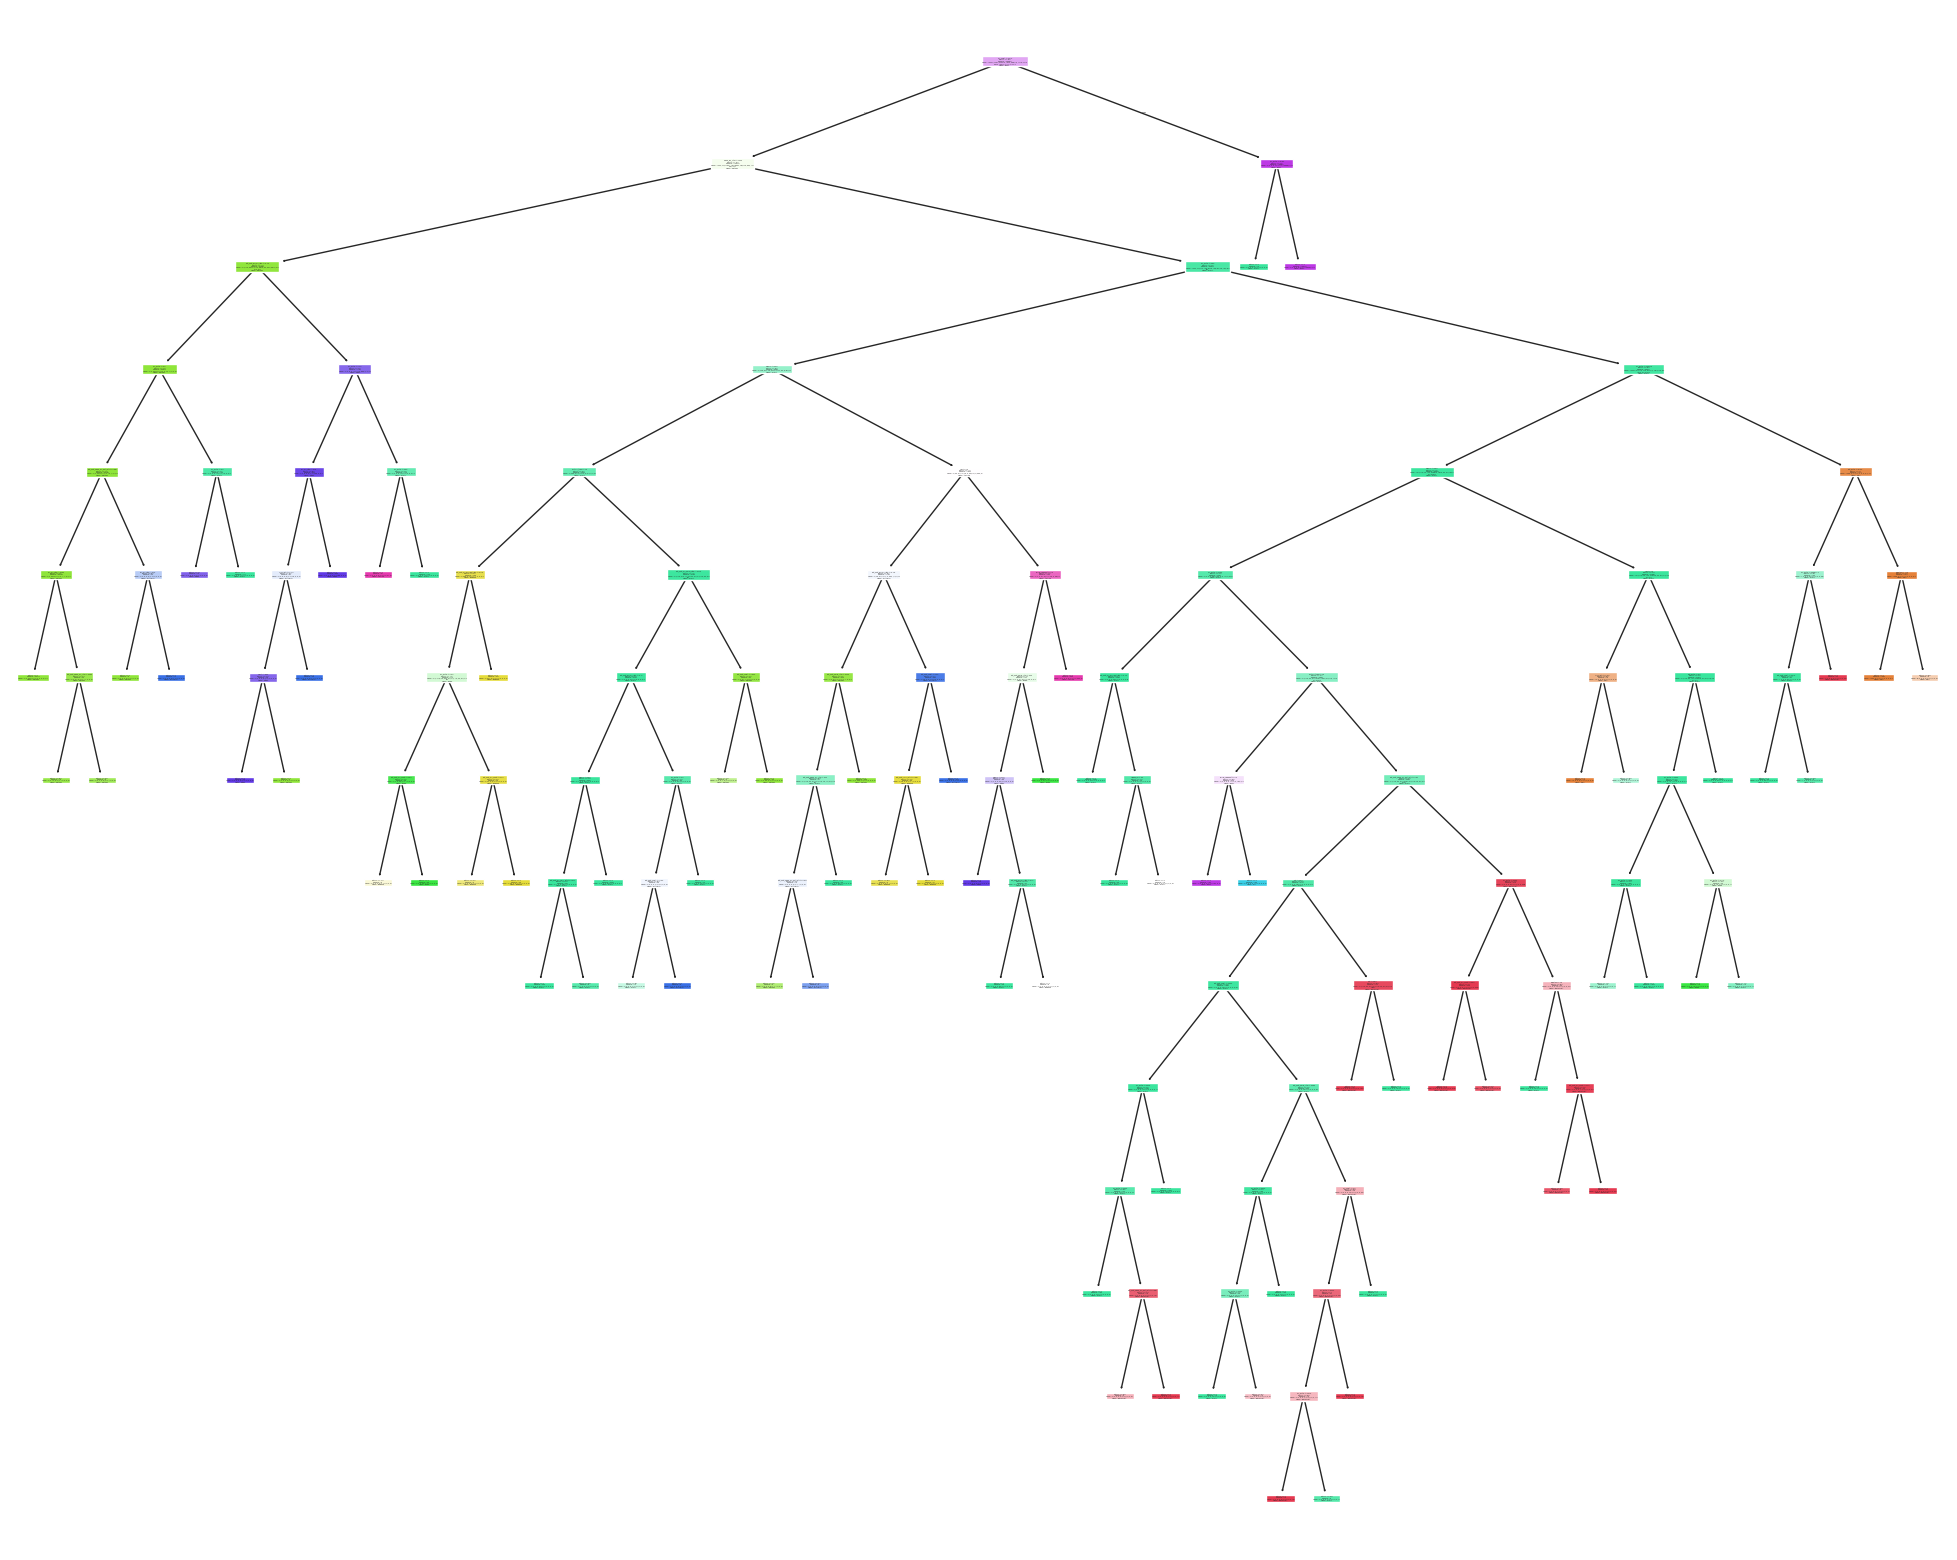

In [31]:
figure = plt.figure(figsize=(25, 20))
_ = plot_tree(clf_best, feature_names=list(X.columns.values), filled=True, class_names=class_names)

## Decision Tree Visualization. Worst Decision Tree models

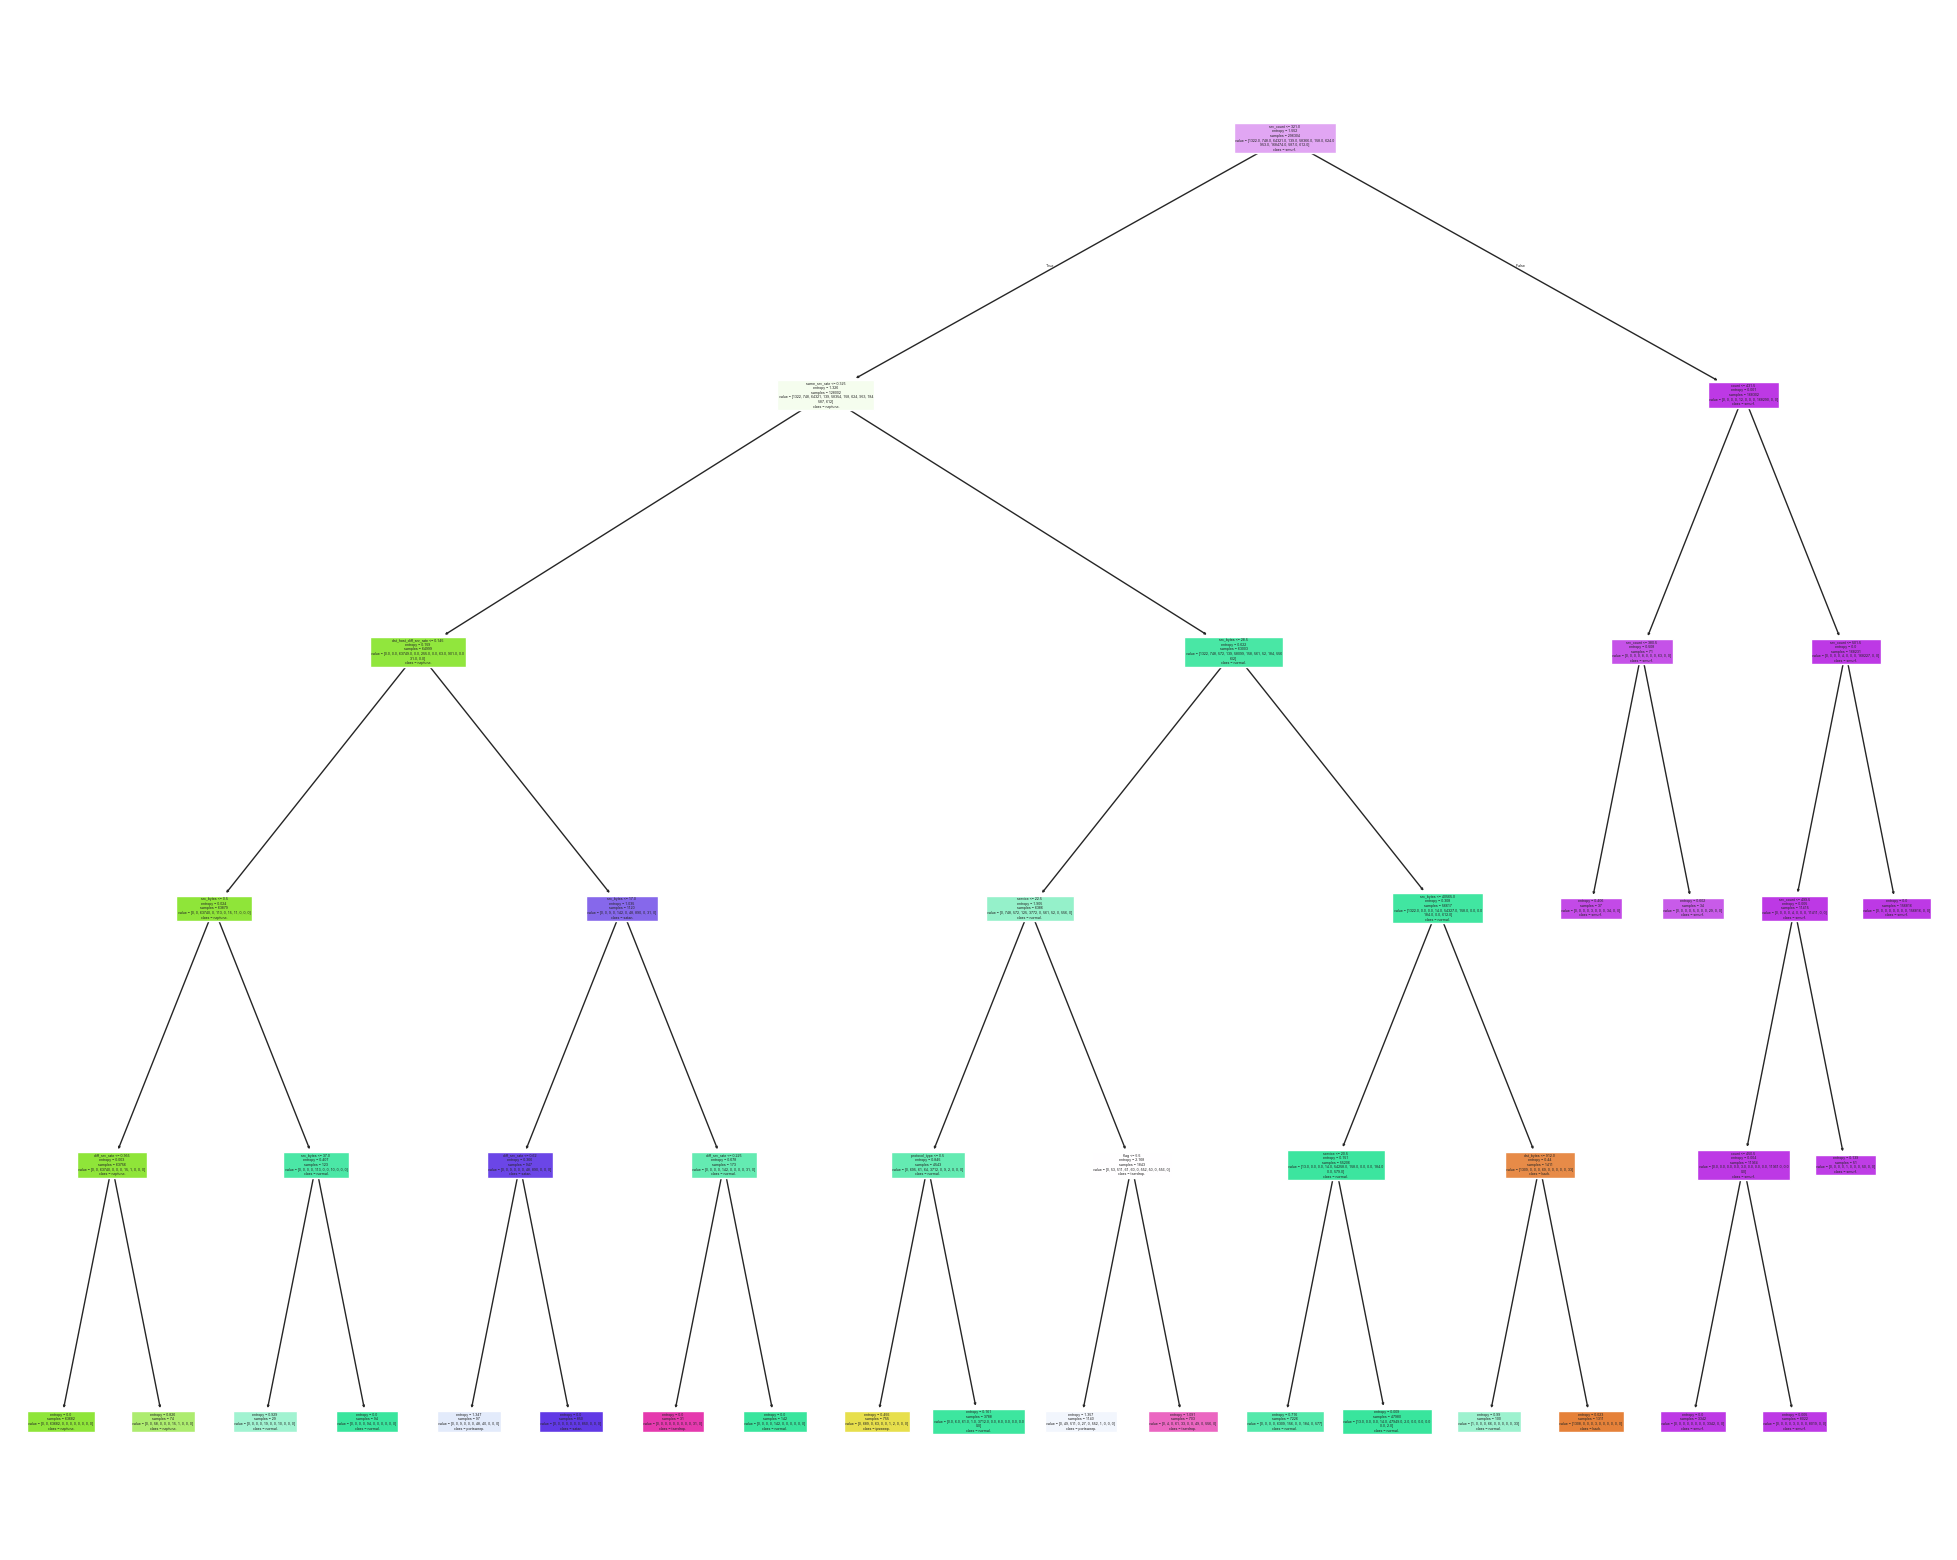

In [32]:
figure_worst = plt.figure(figsize=(25, 20))
_ = plot_tree(clf_worst, feature_names=list(X.columns.values), filled=True, class_names=class_names)

## Random Forest
## Let's try to use Random Forest to classify the data. We will use 5-fold cross validation and stratified split to evaluate the model performance on the validation set and test set later

In [11]:
def forest_objective(trial: optuna.trial.Trial):
    max_depth = trial.suggest_int('max_depth', 3,  10)
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=13)
    skf = StratifiedKFold(n_splits=5, random_state=13, shuffle=True)
    return mean(cross_val_score(estimator=clf, X=X_validation, y=y_validation, scoring="recall_macro", cv=skf))

## Hyperparameter Tuning

In [12]:
if 'Random-Forest-Hyperparameter-Tuning' in optuna.get_all_study_names(storage='sqlite:///db.sqlite3'):
  optuna.delete_study(study_name='Random-Forest-Hyperparameter-Tuning', storage='sqlite:///db.sqlite3')

rf_study = optuna.create_study(direction='maximize', storage='sqlite:///db.sqlite3', study_name='RandomForest-Hyperparameter-Tuning', load_if_exists=True)
rf_study.optimize(lambda trial: forest_objective(trial), n_trials=5)

[I 2024-12-25 16:05:25,185] Using an existing study with name 'RandomForest-Hyperparameter-Tuning' instead of creating a new one.
[I 2024-12-25 16:05:28,761] Trial 8 finished with value: 0.6823513922519614 and parameters: {'max_depth': 5, 'n_estimators': 87}. Best is trial 5 with value: 0.9272742712963187.
[I 2024-12-25 16:05:33,951] Trial 9 finished with value: 0.9067058881194371 and parameters: {'max_depth': 8, 'n_estimators': 115}. Best is trial 5 with value: 0.9272742712963187.
[I 2024-12-25 16:05:38,285] Trial 10 finished with value: 0.9287028427248901 and parameters: {'max_depth': 9, 'n_estimators': 94}. Best is trial 10 with value: 0.9287028427248901.
[I 2024-12-25 16:05:41,114] Trial 11 finished with value: 0.7973186211015432 and parameters: {'max_depth': 6, 'n_estimators': 66}. Best is trial 10 with value: 0.9287028427248901.
[I 2024-12-25 16:05:49,509] Trial 12 finished with value: 0.9431621366080144 and parameters: {'max_depth': 10, 'n_estimators': 181}. Best is trial 12 wit

## Best Hyperparameters

In [13]:
best_rf_trial = rf_study.best_trial
print('Recall: {}'.format(best_rf_trial.value))
print('Best hyperparameters: {}'.format(best_rf_trial.params))

Recall: 0.9431621366080144
Best hyperparameters: {'max_depth': 10, 'n_estimators': 181}


## Worst Hyperparameters

In [16]:
worst_rf_trial = get_worst_trial(rf_study)

print('Recall: {}'.format(worst_rf_trial.value))
print('Worst hyperparameters: {}'.format(worst_rf_trial.params))

Recall: 0.4662780098258016
Worst hyperparameters: {'max_depth': 4, 'n_estimators': 98}


## Train the Random Forest model with the best and worst hyperparameters and evaluate the model performance on the test set

In [17]:
rf_best = RandomForestClassifier(n_estimators=best_rf_trial.params['n_estimators'], max_depth=best_rf_trial.params['max_depth'], random_state=13)
rf_best.fit(X_train, y_train)

rf_worst = RandomForestClassifier(n_estimators=worst_rf_trial.params['n_estimators'], max_depth=worst_rf_trial.params['max_depth'], random_state=13)
rf_worst.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=98, random_state=13)

In [18]:
stratified = StratifiedKFold(n_splits=5, random_state=13, shuffle=True)

## Performance of the best and worst Random Forest models on the test set

In [19]:
print(f'Performance of best classifier on test data: {mean(cross_val_score(estimator=rf_best, X=X_test, y=y_test, scoring="recall_macro", cv=stratified))}')
print(f'Performance of worst classifier on test data: {mean(cross_val_score(estimator=rf_worst, X=X_test, y=y_test, scoring="recall_macro", cv=stratified))}')

Performance of best classifier on test data: 0.9654627562217178
Performance of worst classifier on test data: 0.47945480599096596


## Multi-layer Perceptron
### Let's try to use Multi-layer Perceptron to classify the data. We will use 5-fold cross validation and stratified split to evaluate the model performance on the validation set and test set later

In [24]:
def mlp_objective(trial: optuna.trial.Trial):
    layer_neuron_count= trial.suggest_int('layer_neuron_count', 3,  10)
    layer_count = trial.suggest_int('layer_count', 2,  5)
    clf =  MLPClassifier(hidden_layer_sizes=(layer_neuron_count, layer_count),max_iter=200, random_state=13)
    skf = StratifiedKFold(n_splits=5, random_state=13, shuffle=True)
    return mean(cross_val_score(estimator=clf, X=X_validation, y=y_validation, scoring="recall_macro", cv=skf))

## Hyperparameter Tuning

In [25]:
if 'MLP-Hyperparameter-Tuning' in optuna.get_all_study_names(storage='sqlite:///db.sqlite3'):
  optuna.delete_study(study_name='MLP-Hyperparameter-Tuning', storage='sqlite:///db.sqlite3')

mlp_study = optuna.create_study(direction='maximize', storage='sqlite:///db.sqlite3', study_name='MLP-Hyperparameter-Tuning', sampler=sampler)
mlp_study.optimize(lambda trial: mlp_objective(trial), n_trials=5)

[I 2024-12-25 16:11:46,385] A new study created in RDB with name: MLP-Hyperparameter-Tuning
[I 2024-12-25 16:12:49,078] Trial 0 finished with value: 0.5495066769890077 and parameters: {'layer_neuron_count': 3, 'layer_count': 3}. Best is trial 0 with value: 0.5495066769890077.
[I 2024-12-25 16:13:38,167] Trial 1 finished with value: 0.47338285554417975 and parameters: {'layer_neuron_count': 3, 'layer_count': 5}. Best is trial 0 with value: 0.5495066769890077.
[I 2024-12-25 16:14:10,074] Trial 2 finished with value: 0.29653819276946697 and parameters: {'layer_neuron_count': 5, 'layer_count': 4}. Best is trial 0 with value: 0.5495066769890077.
C:\Users\Maks\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Maks\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: St

## Best Hyperparameters

In [45]:
best_mlp_trial = mlp_study.best_trial
print('Recall: {}'.format(best_mlp_trial.value))
print('Best hyperparameters: {}'.format(best_mlp_trial.params))

Recall: 0.605801721340316
Best hyperparameters: {'layer_neuron_count': 4, 'layer_count': 5}


## Worst Hyperparameters

In [46]:
worst_mlp_trial = get_worst_trial(mlp_study)
print('Recall: {}'.format(worst_mlp_trial.value))
print('Worst hyperparameters: {}'.format(worst_mlp_trial.params))

Recall: 0.2978131767300999
Worst hyperparameters: {'layer_neuron_count': 7, 'layer_count': 2}


## Multi-layer Perceptron Model
## Let's train the Multi-layer Perceptron model with the best and worst hyperparameters and evaluate the model performance on the test set

In [50]:
nn_best = MLPClassifier(hidden_layer_sizes=(best_mlp_trial.params['layer_neuron_count'], best_mlp_trial.params['layer_count']), random_state=13)
nn_best.fit(X_train, y_train)

nn_worst = MLPClassifier(hidden_layer_sizes=(worst_mlp_trial.params['layer_neuron_count'], worst_mlp_trial.params['layer_count']), random_state=13)
nn_worst.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(7, 2), random_state=13)

In [53]:
stratified = StratifiedKFold(n_splits=5, random_state=13, shuffle=True)

## Performance of the best and worst Multi-layer Perceptron models on the test set

In [54]:
print(f'Performance of best classifier on test data: {mean(cross_val_score(estimator=nn_best, X=X_test, y=y_test, scoring="recall_macro", cv=stratified))}')
print(f'Performance of worst classifier on test data: {mean(cross_val_score(estimator=nn_worst, X=X_test, y=y_test, scoring="recall_macro", cv=stratified))}')

Performance of best classifier on test data: 0.6223620322827135
Performance of worst classifier on test data: 0.35165167695770966


# Conclusion


In [26]:
dict = list()

for trial in tree_study.trials:
    dict.append({'model': 'Decision Tree', 'value': trial.value, 'params': trial.params})
for trial in rf_study.trials:
    dict.append({'model': 'Random Forest', 'value': trial.value, 'params': trial.params})
for trial in mlp_study.trials:
    dict.append({'model': 'Multi-layer Perceptron', 'value': trial.value, 'params': trial.params})

df = pd.DataFrame(dict)
df

,model,value,params
0,Decision Tree,0.901875,"{'max_depth': 50, 'min_samples_leaf': 8}"
1,Decision Tree,0.758995,"{'max_depth': 53, 'min_samples_leaf': 31}"
2,Decision Tree,0.840440,"{'max_depth': 63, 'min_samples_leaf': 15}"
3,Decision Tree,0.804726,"{'max_depth': 40, 'min_samples_leaf': 25}"
4,Decision Tree,0.804533,"{'max_depth': 42, 'min_samples_leaf': 24}"
5,Random Forest,0.768793,"{'max_depth': 10, 'n_estimators': 63}"
6,Random Forest,NaN,"{'max_depth': 4, 'n_estimators': 150}"
7,Random Forest,NaN,"{'max_depth': 3, 'n_estimators': 173}"
8,Random Forest,0.850780,"{'max_depth': 7, 'n_estimators': 124}"
9,Random Forest,0.849653,"{'max_depth': 7, 'n_estimators': 152}"


## 1. Decision Tree:
The best performance for the Decision Tree model is achieved with max_depth of `50` and min_samples_leaf of `8`, resulting in a recall score of `0.901875`.
The worst performance for the Decision Tree model is with max_depth of `53` and min_samples_leaf of `31`, resulting in a recall score of `0.758995`.
Overall, the Decision Tree model shows a range of recall scores from `0.758995` to `0.901875`, indicating that the choice of hyperparameters significantly impacts the model's performance.
## 2. Random Forest:
The best performance for the Random Forest model is achieved with max_depth of `10` and n_estimators of `181`, resulting in a recall score of `0.943162`.
The worst performance for the Random Forest model is with max_depth of `4` and n_estimators of `98`, resulting in a recall score of `0.466278`.
There are some trials with NaN values, indicating that these trials did not complete successfully.
Overall, the Random Forest model shows a range of recall scores from `0.466278` to `0.943162`, with the best performance being better than the best Decision Tree model.
## 3. Multi-layer Perceptron (MLP):
The best performance for the MLP model is achieved with layer_neuron_count of `5` and layer_count of `3`, resulting in a recall score of `0.577008`.
The worst performance for the MLP model is with layer_neuron_count of `5` and layer_count of `4`, resulting in a recall score of `0.296538`.
Overall, the MLP model shows a range of recall scores from `0.296538` to `0.577008`, indicating that it performs worse compared to both the Decision Tree and Random Forest models.

## Summary
The Random Forest model generally performs better than the Decision Tree and MLP models, with the highest recall score of `0.943162`.
The Decision Tree model performs reasonably well, with a maximum recall score of `0.901875`.
The MLP model performs the worst among the three, with the highest recall score of `0.577008`.